# <center> NIRS <center> PREDICTION OF DRY MATTER INTAKE
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
***

## IMPORTS

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore')
# Private libary
import cmls

## FUNCTIONS

## READING THE DATASET INTO PYTHON

In [457]:
df0 = pd.read_excel('Datasets/Lucas/dados_nirs_lucas.xlsx')
df = df0

In [458]:
#Reset
df = df0

# Transform all feautere names to string
df.columns = df.columns.map(str)

## DATA DIVISION

In [459]:
# Select all NIRS data as x
x = df.loc[:,'12493.238':'4011.413']

In [460]:
# "MSC{} / savitzky_golay{'deriv': 2, 'order': 2, 'window_size': 13}"
import RG

x = RG.MSC(x.values)[0]
x = RG.savitzky_golay(x, window_size=13, deriv=2, order=2)

In [461]:
x = pd.DataFrame(x)

cols = df.loc[:,'12493.238':'4011.413']

x.columns = cols.columns
del cols

In [462]:
# Add Categoria feature
x = x.join(df.loc[:,['Status fisiologico', 'Categoria']])
x = pd.get_dummies(x, drop_first=False)

In [463]:
# Response variable vector
y = df['Consumo MS kg/dia']

In [464]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

N. samples training 186 , N. samples testing 81


## PRE-PROCESSING

### Feature Scaling

In [465]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Summary Statistics

In [379]:
for i in x_train.index.to_list():
    x_train.loc[i, '12493.238':'4011.413'].plot(kind='line', figsize=(16,8))


plt.ylabel("Absorção")
plt.xlabel("Comprimento de onda(cm^-1)")
plt.grid(visible=True)
plt.title("Espectros de NIRS por amostra após tratamentos de ruído")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

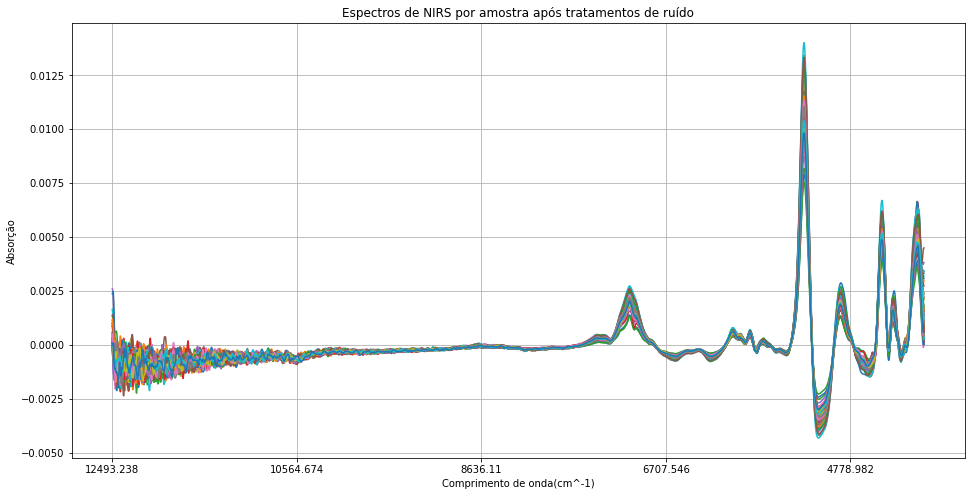

In [321]:
for i in x_test.index.to_list():
    x_test.loc[i, '12493.238':'4011.413'].plot(kind='line', figsize=(16,8))


plt.ylabel("Absorção")
plt.xlabel("Comprimento de onda(cm^-1)")
plt.grid(visible=True)
plt.title("Espectros de NIRS por amostra após tratamentos de ruído")
plt.show()

In [73]:
df.describe()

,Peso corporal kg,Consumo MS kg/dia,Consumo MO kg/dia,Consumo PB kg/dia,Consumo FDN kg/dia,Consumo EE kg/dia,Consumo CNF kg/dia,Fezes MS kg/dia,Fezes MO kg/dia,Fezes PB kg/dia,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,509.824906,6.379836,6.030204,0.619715,3.469328,0.192359,1.711190,2.704554,2.330777,0.263546,...,0.229030,0.213754,0.260170,0.291170,0.286859,0.283470,0.269462,0.242059,0.239917,0.225538
std,102.339137,2.002452,1.875748,0.336699,1.073802,0.080614,0.641736,0.795194,0.720937,0.096765,...,0.199782,0.237003,0.188358,0.156556,0.175760,0.191097,0.185356,0.187441,0.166877,0.164253
min,281.000000,1.429860,1.435228,0.092339,0.577233,0.051604,0.441309,0.760456,0.622813,0.054601,...,-0.276049,-0.395581,-0.238561,-0.024993,-0.125093,-0.180869,-0.196580,-0.261695,-0.144254,-0.129140
25%,425.500000,4.945368,4.651638,0.351819,2.707140,0.134618,1.212661,2.130980,1.851124,0.192972,...,0.107274,0.069525,0.139561,0.179395,0.165436,0.147912,0.157507,0.108506,0.116012,0.106476
50%,530.000000,6.231714,5.898576,0.568794,3.385846,0.182511,1.674349,2.681238,2.313793,0.255564,...,0.229640,0.233216,0.255576,0.287353,0.282204,0.287219,0.283499,0.255783,0.239895,0.216038
75%,582.000000,7.716805,7.304223,0.795090,4.207334,0.232064,2.106837,3.202887,2.748287,0.316227,...,0.350355,0.366050,0.391686,0.387802,0.396442,0.404799,0.388062,0.374971,0.352256,0.347993
max,744.500000,12.277564,11.729826,1.780895,6.722461,0.483549,3.866051,5.143320,4.547951,0.570620,...,0.940678,1.049306,0.902545,0.783421,0.916157,0.859193,0.886101,0.702963,0.752801,0.859664


### Outliers Treatment

<AxesSubplot:>

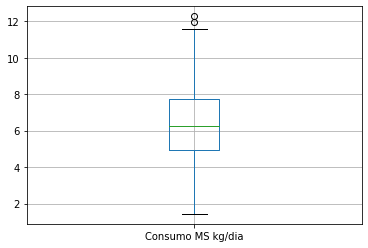

In [80]:
df.boxplot('Consumo MS kg/dia')

In [81]:
for x in ['Consumo MS kg/dia']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan


In [82]:
df[df['Consumo MS kg/dia'].isnull()].index

Int64Index([115, 135], dtype='int64')

In [86]:
df0['Consumo MS kg/dia'].iloc[[115, 135]]

115    11.957976
135    12.277564
Name: Consumo MS kg/dia, dtype: float64

In [87]:
df[df['Consumo MS kg/dia'].isnull()].index

Int64Index([], dtype='int64')

In [146]:
corr = df.corr()

In [147]:
corr['Consumo MS kg/dia'].sort_values(ascending=False)

Consumo MS kg/dia     1.000000
Consumo MO kg/dia     0.998135
Consumo FDN kg/dia    0.950851
Consumo PB kg/dia     0.773645
Consumo EE kg/dia     0.771401
                        ...   
11729.526            -0.226463
12026.525            -0.226475
11725.669            -0.226683
12470.095            -0.228121
TD FDN               -0.256873
Name: Consumo MS kg/dia, Length: 2336, dtype: float64

In [191]:
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

In [192]:
df_out_detect =  df[['Consumo MS kg/dia', 'Consumo FDN kg/dia']]
df_out_detect =  df_out_detect.to_numpy()

In [193]:
# Covariance matrix
covariance  = np.cov(df_out_detect, rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df_out_detect , axis=0)

In [194]:
centerpoint

array([6.3798357 , 3.46932827])

In [195]:
distances = []
for i, val in enumerate(df_out_detect):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df_out_detect.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)

print('--- Observations found as outlier -----')
print(df_out_detect[ distances > cutoff , :])

--- Index of Outliers ----
(array([ 12,  21, 115, 123, 125, 135, 149, 170, 192, 197, 208]),)
--- Observations found as outlier -----
[[10.78358082  6.10652964]
 [ 9.28032003  4.24684375]
 [11.95797601  5.8059139 ]
 [ 9.64298223  4.46443862]
 [ 9.77784679  4.5201679 ]
 [12.27756414  6.72246108]
 [ 2.65464914  0.95021564]
 [11.56022675  6.1669866 ]
 [ 1.4298605   0.57723347]
 [ 9.29875817  6.4472094 ]
 [ 9.43299704  6.39747595]]


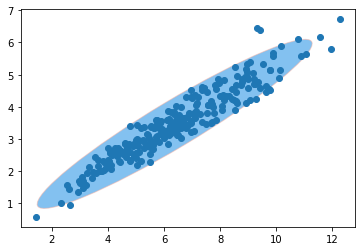

In [196]:
## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df_out_detect[: , 0], df_out_detect[ : , 1])
plt.show()

In [165]:
from scipy import stats
consumo_ms_zscores_descending_index = stats.zscore(df['Consumo MS kg/dia']).sort_values(ascending=False).index.to_list()

In [166]:
d = {'Consumo MS kg/dia' : df['Consumo MS kg/dia'].values, 'Z SCORE': stats.zscore(df['Consumo MS kg/dia'])}

In [168]:
pd.DataFrame(d).sort_values('Z SCORE', ascending=False).head(10)

,Consumo MS kg/dia,Z SCORE
135,12.277564,2.950784
115,11.957976,2.790886
170,11.560227,2.591882
46,11.046499,2.334851
154,10.869008,2.246048
12,10.783581,2.203306
19,10.162714,1.892671
43,10.132946,1.877777
15,10.086903,1.854740
221,9.899514,1.760985


In [ ]:
"""# Remove NIRS data with Z SCORE higher than 3
df = df[(np.abs(stats.zscore(df.loc[:,'12493.238':])) < 3).all(axis=1)]
df.shape"""

/home/caio/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/caio/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


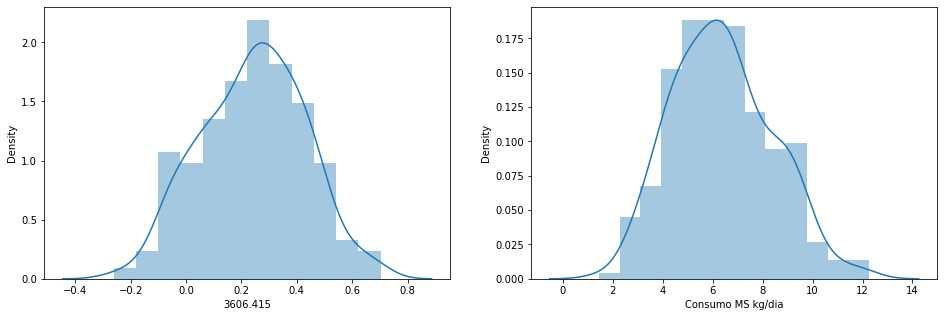

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['3606.415'])
plt.subplot(1,2,2)
sns.distplot(df['Consumo MS kg/dia'])
plt.show()

### Noise Treatment

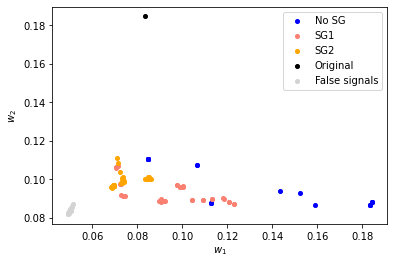

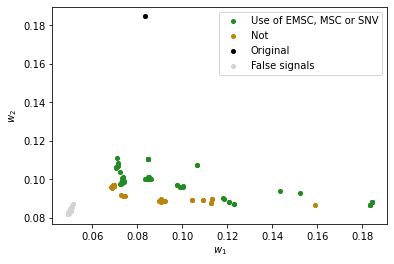

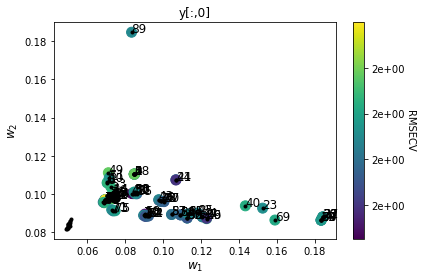

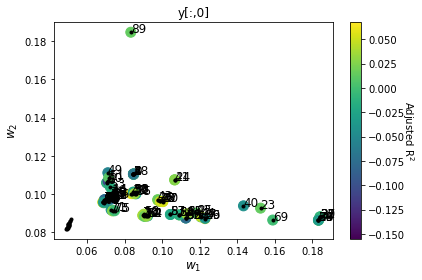

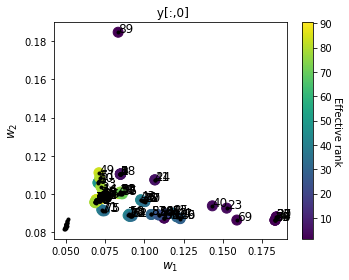

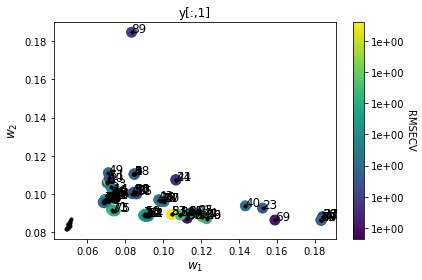

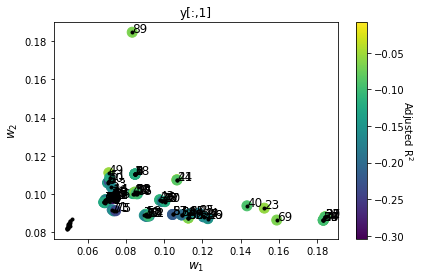

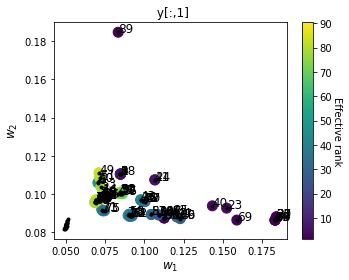

In [13]:
import NIR_preprocess as nir_pre
combination, datasets, datasets0, R2_all, R2adj_all, RMSECV_all, VIP_all, Ef_all, Wt = nir_pre.compare_preprocessing(x_train.values, y_train.values)

In [14]:
RMSECV_all[0].argmin()

48

In [15]:
R2adj_all[0].argmax()

31

In [136]:
x = datasets0[8]

In [16]:
combination[31]

"MSC{} / savitzky_golay{'deriv': 2, 'order': 2, 'window_size': 13}"

### Feature Selecting

In [399]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

k_vs_score = []
for k in range(1,2200,100):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    # learn relationship from training data
    fs.fit(x_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(x_train)
    # transform test input data
    X_test_fs = fs.transform(x_test)

    model = KNeighborsRegressor()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    mae = mean_absolute_error(y_test, yhat)
    # print("k = {} - R2 = {}".format(k, score))

    k_vs_score.append(mae)

<AxesSubplot:>

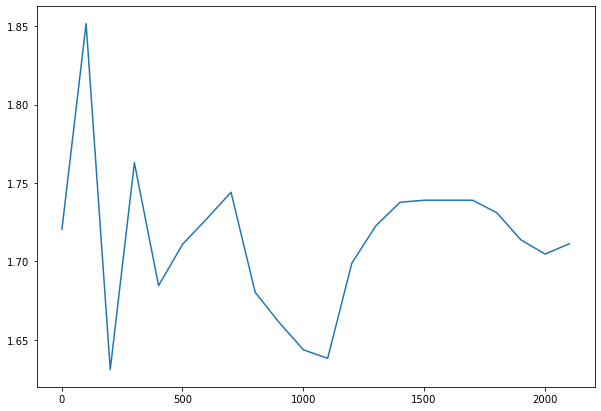

In [400]:
pd.Series(k_vs_score, index=range(1,2200,100)).plot(figsize=(10,7))

In [401]:
scores = np.array(k_vs_score)

In [402]:
scores.size

22

In [403]:
selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(x_train, y_train)

SelectKBest(score_func=<function mutual_info_regression at 0x7f4c7f4d6f70>)

In [404]:
mask = selector.get_support()
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)
x_test.columns = x.columns
x_train.columns = x.columns
x_test.columns[mask]

Index(['11656.241', '7953.398', '6904.259', '5781.835', '5770.264', '5654.55',
       '5168.552', '4994.981', '4859.981', '4470.411'],
      dtype='object')

<AxesSubplot:>

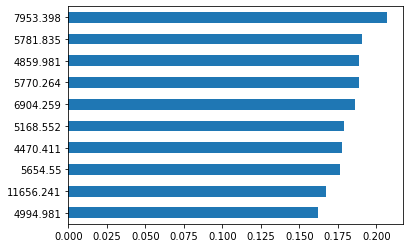

In [405]:
pd.Series(selector.scores_[mask], index=x_train.columns[mask]).sort_values().plot.barh()

In [466]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# configure to select a subset of features
fs = SelectKBest(score_func=mutual_info_regression, k=1100)
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
x_train = fs.transform(x_train)
# transform test input data
x_test = fs.transform(x_test)

## MODEL SELECTION

### Hold Out

In [467]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


pcr = make_pipeline( PCA(n_components=15), LinearRegression())
pcr.fit(x_train, y_train)
pca = pcr.named_steps["pca"] 
print(pca.explained_variance_ratio_)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)


preds = pcr.predict(x_test)
cmls.evalute_model(y_test, preds)

[0.15480401 0.09601003 0.04836576 0.03636339 0.03547426 0.02863683
 0.02593904 0.02434476 0.02072696 0.01815239 0.01384731 0.01123141
 0.01017296 0.00942986 0.00922715]


,R2,MAE,RMSE,RPD
Teste,0.20666,1.461252,1.795749,1.129712


In [468]:
from sklearn.svm import SVR
svr_model = SVR()
preds = svr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.215922,1.435173,1.785235,1.136365


In [469]:
from sklearn.neighbors import KNeighborsRegressor
knnr_model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1, weights='distance', p=1)
knnr_model = make_pipeline( PCA(n_components=70, random_state=0), knnr_model)

preds = knnr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.036966,1.633335,1.978504,1.025361


In [470]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=1, max_depth=4)
preds = gbr_model.fit(x_train, y_train).predict(x_test)
train_preds = gbr_model.predict(x_train)
cmls.evalute_model(y_test, preds, y_train, train_preds)

,R2,MAE,RMSE
Teste,0.158232,1.483135,1.849746
Treino,0.999964,0.010095,0.012016


In [471]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
preds = reg.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.21414,1.460534,1.787263,1.135076


In [472]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, criterion='poisson', random_state=0, n_jobs=-1)

preds = rf.fit(x_train,y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.229711,1.397991,1.769468,1.146491


In [473]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=4, random_state=0)
preds = xgb.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.275036,1.393985,1.716621,1.181787


In [474]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=0, max_iter=500, hidden_layer_sizes=(50, 50, 50))
preds = mlp.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,-0.282026,1.881912,2.282782,0.888687


In [475]:
from sklearn.ensemble import BaggingRegressor

rse = BaggingRegressor(bootstrap=False, base_estimator=KNeighborsRegressor(n_neighbors=3), max_features=128, n_jobs=-1, n_estimators=4, random_state=0)
preds = rse.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.082837,1.571616,1.930808,1.050689


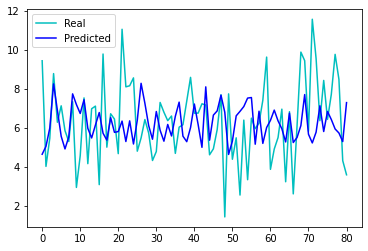

In [417]:
cmls.plot_real_vs_predict(y_test, preds)

### Cross Validation

In [325]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [322]:
svr_model = SVR(kernel='linear', degree=1, gamma='auto', coef0=3.0, tol=0.01, C = 0.1)

svr_scores = cross_val_score(svr_model, x, y, scoring="r2", cv=5)

cmls.display_scores(svr_scores)

Scores: [-0.7949506  -0.0633124  -0.02547018 -0.0343379  -0.08904321]
Mean: -0.20142285698331658
Standard deviation: 0.2976090022191415


In [335]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', knnr_model)])

knnr_scores = cross_val_score(pipe, x, y, scoring="r2", cv=5)

cmls.display_scores(knnr_scores)

Scores: [-0.34779937 -0.1697427   0.21434801  0.01539939  0.01587354]
Mean: -0.054384224739319406
Standard deviation: 0.19048514265501942


In [336]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', gbr_model)])

gbr_scores = cross_val_score(pipe, x, y, scoring="r2", cv=5)

cmls.display_scores(gbr_scores)

Scores: [-0.11613335 -0.37651078  0.1658542   0.04737954  0.09561629]
Mean: -0.03675881896199233
Standard deviation: 0.19359038099013834


In [339]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', reg)])

BayesianRidge_scores = cross_val_score(pipe, x, y, scoring="r2", cv=5)

cmls.display_scores(BayesianRidge_scores)

Scores: [-0.05881131 -0.30103195  0.18314897  0.02388882  0.0681892 ]
Mean: -0.01692325330660187
Standard deviation: 0.16211786406758846


In [341]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', rf)])

rf_scores = cross_val_score(pipe, x, y, scoring="r2", cv=5)

cmls.display_scores(rf_scores)

Scores: [-0.31300061 -0.13956506  0.18657509  0.08994748  0.27027265]
Mean: 0.018845909168417375
Standard deviation: 0.21523014088025608


In [344]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', mlp)])
mlp_scores = cross_val_score(pipe, x, y, scoring="r2", cv=5)

cmls.display_scores(mlp_scores)

Scores: [-0.02546426 -0.12337152  0.19602702  0.03930573 -0.14938759]
Mean: -0.012578122787417257
Standard deviation: 0.12439139770313397


In [348]:
pipe = Pipeline(steps=[('scaler', MinMaxScaler()), ('model', rse)])
rse_scores = cross_val_score(pipe, x, y, scoring="r2", cv=5)

cmls.display_scores(rse_scores)

Scores: [-0.29722159 -0.02889517  0.20651637 -0.03214373  0.04514985]
Mean: -0.021318853238386115
Standard deviation: 0.16286428617791468


## Few Features Test

In [102]:
corrs_td_pb = df.corr(method='pearson').loc[:, 'Cons'].sort_values(ascending=False)

In [103]:
corrs_td_pb[:20]

TD PB                1.000000
Consumo PB kg/dia    0.809197
CD PB                0.753460
3745.271             0.392619
Consumo MS kg/dia    0.373019
Consumo MO kg/dia    0.356430
CD MS                0.338232
3741.414             0.332617
Consumo EE kg/dia    0.315860
3629.557             0.315445
CD MO                0.314014
5091.409             0.310276
5095.266             0.310225
5087.552             0.310009
5075.98              0.309885
5072.123             0.309837
5079.838             0.309829
5083.695             0.309814
5068.266             0.309725
5099.123             0.309700
Name: TD PB, dtype: float64

In [111]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import r2_score

k_vs_score = []

for k in range(3,1000,1):
    selector = SelectKBest(score_func=f_regression, k=k)

    X_train2 = selector.fit_transform(x_train, y_train)
    X_test2 = selector.transform(x_test)


    svr_model = SVR()
    svr_model.fit(X_train2, y_train)

    preds = svr_model.predict(X_test2)

    score = r2_score(y_test, preds)
    # print("k = {} - R2 = {}".format(k, score))

    k_vs_score.append(score)

<AxesSubplot:>

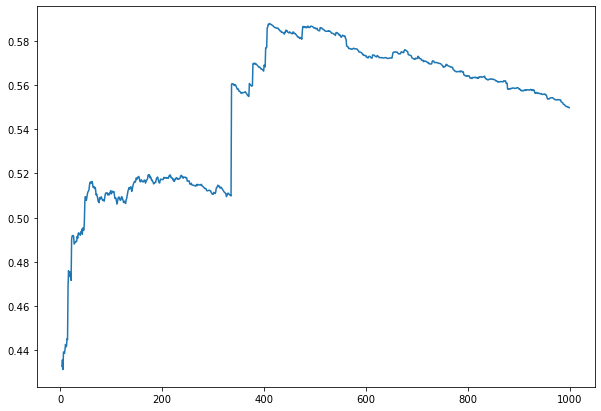

In [112]:
pd.Series(k_vs_score, index=range(3,1000,1)).plot(figsize=(10,7))

In [106]:
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(x_train, y_train)

SelectKBest(score_func=<function f_regression at 0x7fb4602c9dc0>)

In [107]:
mask = selector.get_support()
x_test.columns[mask]
# Features mais relevantes

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
pd.Series(selector.scores_[mask], index=x_train.columns[mask]).sort_values().plot.barh()

In [ ]:
# Non NIRS features
print(df.loc[:,:'CD CNF'].columns.tolist())

In [ ]:
# Select all NIRS data as x
x = df.loc[:,'12493.238':]

# Add Categoria feature
x = x.join(df.loc[:,['Status fisiologico', 'Categoria']])
x = pd.get_dummies(x, drop_first=False)

In [ ]:
predictive_features = ['12462.381', '12458.523', '12454.666', '12450.809', '3745.271',
       '3741.414', '3706.7', '3629.557', 'Status fisiologico_Lactante']

x = x[predictive_features]

# One-Hot Encode categorical features
x = pd.get_dummies(x, drop_first=False)

In [ ]:
# Response variable vector
y = df['TD PB']

In [ ]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

## MODEL SELECTION

### Hold Out

In [476]:
from sklearn.svm import SVR
svr_model = SVR()
preds = svr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.215922,1.435173,1.785235,1.136365


In [477]:
from sklearn.neighbors import KNeighborsRegressor
knnr_model = KNeighborsRegressor()
preds = knnr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.129196,1.552542,1.881379,1.078294


In [478]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
preds = gbr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.189885,1.471173,1.814635,1.117955


In [479]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
preds = reg.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.21414,1.460534,1.787263,1.135076


In [480]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
preds = rf.fit(x_train,y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.19997,1.425002,1.803305,1.124979


In [481]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=0)
preds = mlp.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

/home/caio/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,R2,MAE,RMSE,RPD
Teste,0.193514,1.481003,1.810566,1.120467


In [ ]:
cmls.plot_real_vs_predict(y_test, preds)

## Feature Selecting

### Selection Process

In [101]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression)

In [ ]:
x_new = selector.fit_transform(x, y)

In [ ]:
#selector.get_feature_names_out()

In [ ]:
# Split the data set with selected features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.30, shuffle=True, random_state=40)

### After Selecting

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR()
svr_preds = svr_model.fit(x_train, y_train).predict(x_test)

In [ ]:
print(f'R2: {r2_score(y_test, svr_preds)}')

##  Hyperparameters search

### SVR

In [284]:
from sklearn.model_selection import cross_val_score

In [285]:
def tune_svr(params):
    from sklearn.model_selection import cross_val_score
    kernel = params[0]
    degree = params[1]
    gamma = params[2]
    coef0 = params[3]
    tol = params[4]
    C = params[5]
    
    print(params, '\n')
    
    svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, tol=tol, C=C)
    

    r2 = cross_val_score(svr_model, x, y, cv=5, scoring ='r2')
    
    return -r2.mean()

space = [
    ['linear', 'poly', 'rbf', 'sigmoid'], #kernal
    (1, 12), #degree
    ['scale', 'auto'], # gamma
    (0.05, 3.0), # coef0
    (0.000001, 0.01), # tol
    [0.1, 1, 10, 100, 1000]] # C

In [ ]:
%%time
from skopt import gp_minimize
svr_best_params = gp_minimize(tune_svr, space, random_state=0, verbose=True, n_calls=100, n_random_starts=20, n_jobs=-1)

In [ ]:
svr_best_params.x

In [84]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', degree=1, gamma='auto', coef0=3.0, tol=0.01, C = 0.1)

svr_model.fit(x_train, y_train)
preds = svr_model.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.632401,1.350428,1.706229,1.660025


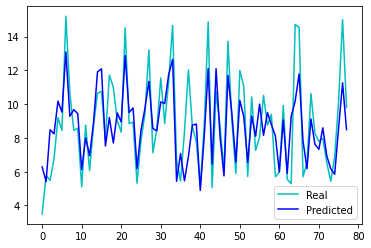

In [66]:
cmls.plot_real_vs_predict(y_test, preds)

### RF

In [287]:
from sklearn.model_selection import cross_val_score

In [288]:
def tune_rf(params):
    from sklearn.model_selection import cross_val_score
    bootstrap = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    n_estimators = params[4]
    
    print(params, '\n')
    
    rf_model = RandomForestRegressor(bootstrap=bootstrap, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                     min_samples_split=min_samples_split,n_estimators=n_estimators, random_state=0, criterion='poisson', n_jobs=-1)
    

    r2 = cross_val_score(rf_model, x_train, y_train, cv=5, scoring ='r2')
    
    return -r2.mean()

space = [
    [True, False], #bootstrap
    [10, 20, 30, None], #max_depth
    [1, 2, 4], # min_samples_leaf
    [2, 5, 10], # min_samples_split
    [5, 10, 20, 50, 100, 200, 300]] # n_estimators

In [289]:
%%time
from skopt import gp_minimize
rf_best_params = gp_minimize(tune_rf, space, random_state=0, verbose=True, n_calls=100, n_random_starts=20, n_jobs=-1)

Iteration No: 1 started. Evaluating function at random point.
[True, None, 4, 10, 100] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.3642
Function value obtained: -0.1621
Current minimum: -0.1621
Iteration No: 2 started. Evaluating function at random point.
[False, 20, 1, 5, 50] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.0156
Function value obtained: 0.5851
Current minimum: -0.1621
Iteration No: 3 started. Evaluating function at random point.
[True, 20, 2, 10, 20] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4631
Function value obtained: -0.1149
Current minimum: -0.1621
Iteration No: 4 started. Evaluating function at random point.
[True, 20, 4, 2, 200] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.1667
Function value obtained: -0.1669
Current minimum: -0.1669
Iteration No: 5 started. Evaluating function at random point.
[False, 30, 2, 5, 100] 

Iteration No: 5 ended. Evaluation d

KeyboardInterrupt: 

In [246]:
rf_best_params.x

[True, 10, 4, 2, 100]

In [247]:
rf_model = RandomForestRegressor(bootstrap=True, max_depth=10,
                                     min_samples_leaf=4, min_samples_split=2,
                                     n_estimators=100, random_state=0, criterion='poisson', n_jobs=-1)

svr_model.fit(x_train, y_train)
preds = svr_model.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE,RPD
Teste,0.581916,1.237431,1.819624,1.556576


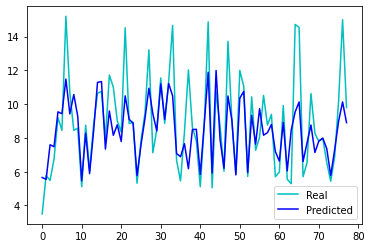

In [248]:
cmls.plot_real_vs_predict(y_test, preds)